In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('prosperLoanData.csv')


## Table of Contents
<ul>
<li><a href="#INTRO">Introduction</a></li>
<li><a href="#Def">Explanation of terms used in data</a></li>
<li><a href="#WRANG">Data Wrangling</a></li>
<li><a href="#UNI">Univariate Data Exploring, plot and analysis</a></li>
<li><a href="#BI">Bivariate Data Exploring, plot and analysis</a></li>
<li><a href="#MLTY">Multivariate Data Exploring, plot and analysis</a></li>
<li><a href="#CONCL">Final Insights plots and conclusion</a></li>
</ul>

<a id='INTRO'></a>
# Introduction:
This project is part of UDACITY Advanced level of data analysis nano degree where a data analysis job is done on data set provided by [**prosper**](https://www.prosper.com/plp/about/) which is  America’s first marketplace lending platform, with over $12 billion in funded loans.

Prosper allows people to invest in each other in a way that is financially and socially rewarding. On Prosper, borrowers list loan requests between $2,000 and $40,000 and individual investors invest as little as $25 in each loan listing they select. Prosper handles the servicing of the loan on behalf of the matched borrowers and investors.

Prosper Funding LLC is a wholly-owned subsidiary of Prosper Marketplace, Inc.

Prosper Marketplace is backed by leading investors including Sequoia Capital, Francisco Partners, Institutional Venture Partners, and Credit Suisse NEXT Fund.

The main purposes of this project are to summarize the characteristics of  variables that can affect the loan status and to get some ideas about the  relationships among multiple variables using summary statistics and data  visualizations.

<a id='Def'></a>
# Explanation of Terms used in the data:
- **ListingKey:** This is a unique key for each borrower.
- **Term:** Express the number of months that the loan will be charged off.
- **BorrowerAPR:** This is the annual cost of loan to borrower but unlike borrower rate as it include other charges in addition   to interest rate and also is expressed in percentage.
- **BorrowerRate:** Refer to the annual cost of loan to a borrower or interest rate and it is expressed in percentage.
- **ListingCategory (numeric):** categories of borrower in a numeric values.
- **ProsperScore:** Is a risk score created by the bank for the prosper depending on the historical data and it range from 0 to   10 where 0 represent the prosper with high risk and 10 represent the best prosper with lowest risk.
- **ProsperRating (Alpha):** categorize the rate of prosper to alphabetical rating where 'A' is the highest and 'HR' is the       lowest.
- **BorrowerState:** This is the state of borrower in America expressed by unique letters like 'NY' for New York. 
- **Occupation:** This is the profession of prosper like doctor, engineer,etc....
- **EmploymentStatus:** The status of employment of the prosper like self-employed,employed,full-time, etc...
- **EmploymentstatusDuration :** Is the total time that the prosper is employed at the time of loan and it is expressed in       days.
- **CreditScoreRangeLower:** Loer limit of score range.
- **CreditScoreRangeUpper:** upper limit of score range.
- **TotalCreditLinespast7years:** This number represent the number of times that the count is credited in the last seven years.
- **TotalInquiries :** This is created by the bank to express the bevior of prosper in paying back the previous loans, so the     high number express bad behavior.
- **DelinquenciesLast7Years:** This express how many times the borrower became late on paying loan term, so this may indicate     the borrower rate and corresponding interest of loan.
- **BankcardUtilization :** It's how much you currently owe divided by your credit limit. It is generally expressed as a         percent.
- **DebtToIncomeRatio :** Ratio between debit and income.
- **AvailableBankcardCredit :** This is the available credit in your card.
- **StatedMonthlyIncome :** Monthly income.
- **LoanOriginalAmount :** Loan amount.
- **MonthlyLoanPayment :** payment of loans per month.

<a id='WRANG'></a>
# Data Wrangling:

## 1. Exploring all the columns in the data set:

In [2]:
# displaying all columns in data frame:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

## 2. Selecting the columns of concern in our data analysis:

In [3]:
# we select the required columns in data analysis:
col=['ListingKey','Term','BorrowerAPR','BorrowerRate','ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration',
       'IsBorrowerHomeowner','CreditScoreRangeLower','AvailableBankcardCredit','CreditScoreRangeUpper','TotalInquiries','DelinquenciesLast7Years','BankcardUtilization','DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount','LoanStatus','MonthlyLoanPayment']

In [4]:
# creating a list of selected columns index in the main data to be able to create sub data on which we can do our analysis:
new_cols=[]
for i,v in enumerate(df.columns):
    if v in col:
        new_cols.append(i)        
# Creating a new data frame having only the selected columns:
df_sub=df.iloc[:,new_cols]
df_sub.head()  

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,CreditScoreRangeLower,CreditScoreRangeUpper,TotalInquiries,DelinquenciesLast7Years,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,1021339766868145413AB3B,36,Completed,0.16516,0.1580,NaN,NaN,NaN,0,CO,...,640.0,659.0,3.0,4.0,0.00,1500.0,0.17,3083.333333,9425,330.43
1,10273602499503308B223C1,36,Current,0.12016,0.0920,6.0,A,7.0,2,CO,...,680.0,699.0,5.0,0.0,0.21,10266.0,0.18,6125.000000,10000,318.93
2,0EE9337825851032864889A,36,Completed,0.28269,0.2750,NaN,NaN,NaN,0,GA,...,480.0,499.0,1.0,0.0,NaN,NaN,0.06,2083.333333,3001,123.32
3,0EF5356002482715299901A,36,Current,0.12528,0.0974,6.0,A,9.0,16,GA,...,800.0,819.0,1.0,14.0,0.04,30754.0,0.15,2875.000000,10000,321.45
4,0F023589499656230C5E3E2,36,Current,0.24614,0.2085,3.0,D,4.0,2,MN,...,680.0,699.0,9.0,0.0,0.81,695.0,0.26,9583.333333,15000,563.97


In [5]:
#displaying the information on all selected columns:
df_sub.info()
# so it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (numeric)    84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   BorrowerState              108422 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  EmploymentStatusDuration   106312 non-null  float64
 13  IsBorrowerHomeowner        11

- so it seems that the data have many missing data that shall be removed.

## 3. cleaning of sub data:

### 3.1 Removing rows having missing values:

In [6]:
#dropping all rows having missing values:
df_sub=df_sub.dropna()
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 76216 non-null  object 
 1   Term                       76216 non-null  int64  
 2   LoanStatus                 76216 non-null  object 
 3   BorrowerAPR                76216 non-null  float64
 4   BorrowerRate               76216 non-null  float64
 5   ProsperRating (numeric)    76216 non-null  float64
 6   ProsperRating (Alpha)      76216 non-null  object 
 7   ProsperScore               76216 non-null  float64
 8   ListingCategory (numeric)  76216 non-null  int64  
 9   BorrowerState              76216 non-null  object 
 10  Occupation                 76216 non-null  object 
 11  EmploymentStatus           76216 non-null  object 
 12  EmploymentStatusDuration   76216 non-null  float64
 13  IsBorrowerHomeowner        76216 non-null  bo

In [7]:
#check for null values:
df_sub.isnull().sum()

ListingKey                   0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ProsperRating (numeric)      0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
EmploymentStatusDuration     0
IsBorrowerHomeowner          0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
TotalInquiries               0
DelinquenciesLast7Years      0
BankcardUtilization          0
AvailableBankcardCredit      0
DebtToIncomeRatio            0
StatedMonthlyIncome          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
dtype: int64

### 3.2 Check forduplicates:

In [8]:
# check for duplicates:
sum(df_sub.duplicated())

0

### 3.3 Exploring and adjusting categorical columns:

In [9]:
# checking the unique values of 'Term' column:
df_sub['Term'].unique()

array([36, 60, 12], dtype=int64)

- so it seems that the data are not ordered

In [10]:
# checking the unique values of 'EmploymentStatus' column:
df_sub['EmploymentStatus'].unique()

array(['Employed', 'Other', 'Full-time', 'Part-time', 'Retired',
       'Self-employed', 'Not employed'], dtype=object)

In [11]:
# checking the unique values of 'ListingCategory (numeric)' column:
df_sub['ListingCategory (numeric)'].unique()

array([ 2, 16,  1,  7, 13,  6, 15, 20, 19, 18,  8, 11,  3, 14,  9, 17,  0,
       10,  5, 12], dtype=int64)

- so it seems the listing categories are not ordered.

In [12]:
df_sub['ProsperRating (numeric)'].unique()

array([6., 3., 5., 2., 4., 7., 1.])

- so it seems that the data are not integer values and are not ordered.

In [13]:
df_sub['ProsperRating (Alpha)'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

- so it seems that the data are not ordered where it shall take the order from best to worest [AA,A,B,C,D,E,HR]

In [14]:
#renaming of some columns to be suitable during data analysis:
#'ProsperRating (numeric)' to be changed to 'ProsperRating_numeric' 
#'ProsperRating (Alpha)' to be changed to 'ProsperRating_Alpha'
#'ListingCategory (numeric)' to be changed to 'ListingCategory'
df_sub.rename(columns = {'ProsperRating (Alpha)':'ProsperRating_Alpha','ProsperRating (numeric)':'ProsperRating_numeric','ListingCategory (numeric)':'ListingCategory'}, inplace = True)
df_sub.columns

Index(['ListingKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_numeric', 'ProsperRating_Alpha', 'ProsperScore',
       'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'TotalInquiries',
       'DelinquenciesLast7Years', 'BankcardUtilization',
       'AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'MonthlyLoanPayment'],
      dtype='object')

In [15]:
# adjusting data frame to have categorical data of listing category and terms in ordered data:
## First : ordering of Term column:
terms = list(df_sub.Term.unique())
terms.sort()

# converting data in column term to ordered categorey:
loan_terms = pd.api.types.CategoricalDtype(ordered = True, categories = terms)
df_sub.Term = df_sub.Term.astype(loan_terms)

# verifying that the data type of Term is ordered category:
df_sub.Term.dtype
## second: ordering of listingcategory column:
categories=list(df_sub.ListingCategory.unique())
categories.sort()
# converting data to ordered values:
ordered_categories=pd.api.types.CategoricalDtype(ordered = True,categories=categories)
df_sub.ListingCategory = df_sub.ListingCategory.astype(ordered_categories)
df_sub.ListingCategory.dtype
## Third: ordering of 'ProsperRating_numeric' column:
prosper_rates=list(df_sub.ProsperRating_numeric.unique().astype(int))
prosper_rates.sort()
# converting data in column'ProsperRating_numeric' to ordered values:
prosper_cat_nu=pd.api.types.CategoricalDtype(ordered = True,categories=prosper_rates)
df_sub.ProsperRating_numeric=df_sub.ProsperRating_numeric.astype(prosper_cat_nu)
df_sub.ProsperRating_numeric.dtype
## Fourth : converting data in column 'ProsperRating_Alpha' to ordered values from lowest to highest to be matching with numerical score:
prosper_rates_alph=['HR','E','D','C','B','A','AA']

prosper_cat_alpha =pd.api.types.CategoricalDtype(ordered = True,categories=prosper_rates_alph)
df_sub.ProsperRating_Alpha=df_sub.ProsperRating_Alpha.astype(prosper_cat_alpha)
df_sub.ProsperRating_Alpha.dtype

CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)

In [16]:
# changing the data type for some columns from float type to integer type:
column_list = ['EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper','TotalInquiries', 'DelinquenciesLast7Years']
for col in column_list:
    df_sub[col]=df_sub[col].astype(int)
    print(col,df_sub[col].dtype)

EmploymentStatusDuration int32
CreditScoreRangeLower int32
CreditScoreRangeUpper int32
TotalInquiries int32
DelinquenciesLast7Years int32


### 3.4 Changing data types for some columns:

In [17]:
# converting data type of LoanOriginalAmount column to float type:
df_sub.LoanOriginalAmount=df_sub.LoanOriginalAmount.astype(float)
df_sub.LoanOriginalAmount.dtype

dtype('float64')

### 3.5 Adjusting the no. of decimals for some columns:

In [18]:
# adjusting the values of column 'StatedMonthlyIncome' to be rounded by two digits:
df_sub.StatedMonthlyIncome = df_sub.StatedMonthlyIncome.round(decimals = 2)
df_sub.StatedMonthlyIncome.sample(5)

87778    6666.67
54307    2083.33
62008    6666.67
77238    2916.67
77978    4149.00
Name: StatedMonthlyIncome, dtype: float64

### 3.6 Creating new column including the upper and lower credit score:

In [19]:
df_sub.CreditScoreRangeLower.unique()

array([680, 800, 740, 700, 820, 640, 660, 720, 760, 780, 600, 620, 840,
       860, 880])

In [20]:
df_sub.CreditScoreRangeUpper.unique()

array([699, 819, 759, 719, 839, 659, 679, 739, 779, 799, 619, 639, 859,
       879, 899])

In [21]:
# combining lower and upper credit score and converting the combination to string to represent categories :
columns=['CreditScoreRangeLower', 'CreditScoreRangeUpper']
# converting data type from float to string:
for column in columns:
    df_sub[column] = df_sub[column].astype(dtype='str')

# joing the two boundaries of ranges:
df_sub['CreditScoreRange'] = df_sub[columns].apply(lambda x: '-'.join(x), axis = 1)

# ordering the unique values in the column of 'CreditScoreRange':
ranges = list(df_sub.CreditScoreRange.unique())
ranges.sort()

# converting the data of the new column to ordinal categorical data:
credit_score_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = ranges)
df_sub.CreditScoreRange = df_sub.CreditScoreRange.astype(credit_score_ranges)
df_sub.CreditScoreRange.dtype

CategoricalDtype(categories=['600-619', '620-639', '640-659', '660-679', '680-699',
                  '700-719', '720-739', '740-759', '760-779', '780-799',
                  '800-819', '820-839', '840-859', '860-879', '880-899'],
                 ordered=True)

In [22]:
#dropping the original two columns of upper and lower credit score range:
df_sub.drop(columns=columns,inplace=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ListingKey                76216 non-null  object  
 1   Term                      76216 non-null  category
 2   LoanStatus                76216 non-null  object  
 3   BorrowerAPR               76216 non-null  float64 
 4   BorrowerRate              76216 non-null  float64 
 5   ProsperRating_numeric     76216 non-null  category
 6   ProsperRating_Alpha       76216 non-null  category
 7   ProsperScore              76216 non-null  float64 
 8   ListingCategory           76216 non-null  category
 9   BorrowerState             76216 non-null  object  
 10  Occupation                76216 non-null  object  
 11  EmploymentStatus          76216 non-null  object  
 12  EmploymentStatusDuration  76216 non-null  int32   
 13  IsBorrowerHomeowner       76216 non-null  boo

- so the upper and lower credit score range columns are removed from data

### 3.7 Adjusting the index of new cleaned data:

In [23]:
#displaying index values of data:
df_sub.index

Int64Index([     1,      3,      4,      5,      6,      7,      8,      9,
                10,     12,
            ...
            113925, 113928, 113929, 113930, 113931, 113932, 113933, 113934,
            113935, 113936],
           dtype='int64', length=76216)

In [24]:
# adjusting the values of index after cleaning data as done before by dropping all rows having missing data:
df_sub.reset_index(drop = True, inplace = True)
df_sub.head()

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating_numeric,ProsperRating_Alpha,ProsperScore,ListingCategory,BorrowerState,...,IsBorrowerHomeowner,TotalInquiries,DelinquenciesLast7Years,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,CreditScoreRange
0,10273602499503308B223C1,36,Current,0.12016,0.0920,6,A,7.0,2,CO,...,False,5,0,0.21,10266.0,0.18,6125.00,10000.0,318.93,680-699
1,0EF5356002482715299901A,36,Current,0.12528,0.0974,6,A,9.0,16,GA,...,True,1,14,0.04,30754.0,0.15,2875.00,10000.0,321.45,800-819
2,0F023589499656230C5E3E2,36,Current,0.24614,0.2085,3,D,4.0,2,MN,...,True,9,0,0.81,695.0,0.26,9583.33,15000.0,563.97,680-699
3,0F05359734824199381F61D,60,Current,0.15425,0.1314,5,B,10.0,1,NM,...,True,2,0,0.39,86509.0,0.36,8333.33,15000.0,342.37,740-759
4,0F0A3576754255009D63151,36,Current,0.31032,0.2712,2,E,2.0,1,KS,...,False,0,0,0.72,1929.0,0.27,2083.33,3000.0,122.67,680-699


### 3.8 Saving the cleaned data to CSV file 'prosperLoanData_clean.csv':

In [25]:
#saving the cleaned data to one csv file:
df_sub.to_csv('prosperLoanData_clean.csv', index = False)

<a id='UNI'></a>
 # <font color='red'>- Univariate Data Exploring,plot and analysis:</font> 


### <font color='blue'>1. Analysing the number of listings per state:</font> 


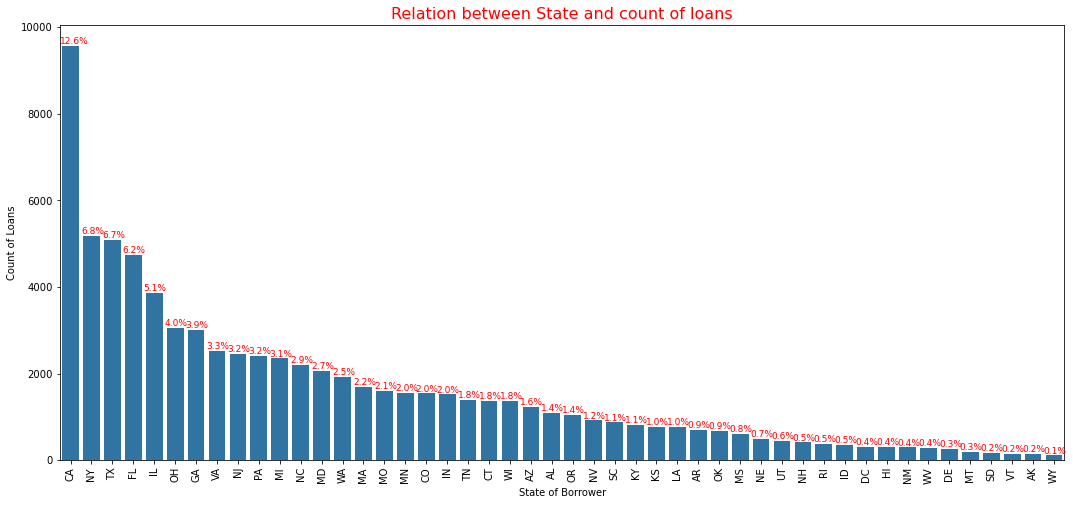

In [26]:
# plotting by using seaborn library after selecting color and ordering of states as per count of loans in each state:
plt.figure(figsize=[18,8])
color=sb.color_palette()[0]
freq=df_sub['BorrowerState'].value_counts()
order=freq.index
n_freq=freq.sum()
#state_max=freq[0] # used when we need to show count as proportion
#state_prop=n_freq/state_max # used when we need to show count as proportion
#prop_ticks=np.arange(0,state_max,0.02) # used when we need to show count as proportion
#tick_names = ['{:0.2f}'.format(v) for v in prop_ticks] # used when we need to show count as proportion
#plt.yticks(prop_ticks*n_freq,tick_names) # used when we need to show count as proportion
sb.countplot(data=df_sub,x='BorrowerState',color=color,order=order);
for i in range (freq.shape[0]):
    count=freq[i]
    label='{:0.1f}%'.format(100*count/n_freq)
    plt.text(i-0.5,count+100,label,va='center',fontsize=9,color='r')
plt.xlabel('State of Borrower');
plt.ylabel('Count of Loans');
plt.title('Relation between State and count of loans',fontsize=16,color='red')
plt.xticks(rotation=90);

**INSIGHT**
- So as shown most of **Borrower** are from CA (*12.6%*),NY (*6.8%*),TX (*6.7%*),FL (*6.2%*) and IL (*5.1%*) and these states as known are characterized by high populations in United States.

###  <font color='blue'>2. Analyzing the count of loans under each loan status:</font> 


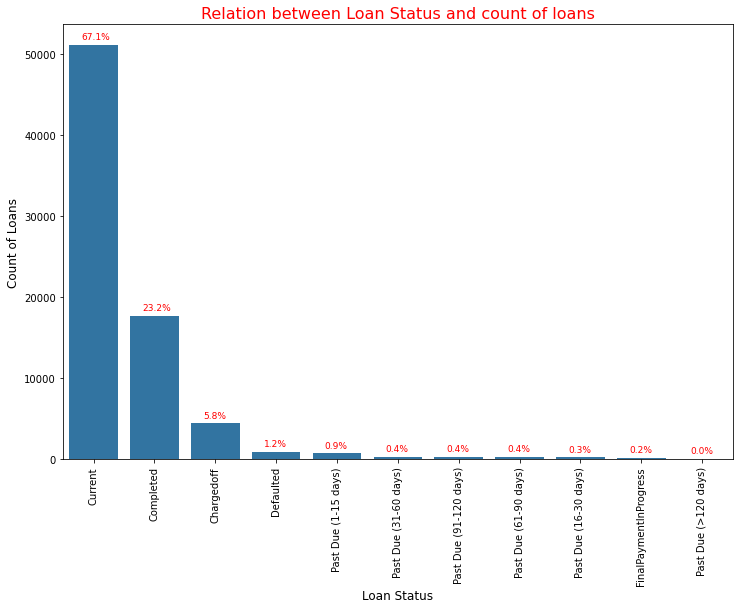

In [27]:
#plotting the relation between loan status and count of loans after selecting color and order of loans status.
plt.figure(figsize=[12,8])
color=sb.color_palette()[0]
freq=df_sub['LoanStatus'].value_counts()
order=freq.index
n_freq=freq.sum()
sb.countplot(data=df_sub,x='LoanStatus',color=color,order=order);
for i in range (freq.shape[0]):
    count=freq[i]
    label='{:0.1f}%'.format(100*count/n_freq)
    plt.text(i-0.2,count+1000,label,va='center',fontsize=9,color='r')
plt.xlabel('Loan Status',fontsize=12);
plt.ylabel('Count of Loans',fontsize=12);
plt.title('Relation between Loan Status and count of loans',fontsize=16,color='red')
plt.xticks(rotation=90);

**INSIGHT**
- So it seems that there is an increase in number of loans where the count of current loans is very high relative to other       loans status.

### <font color='blue'>3. Analyzing the employment status against count of loans:</font> 


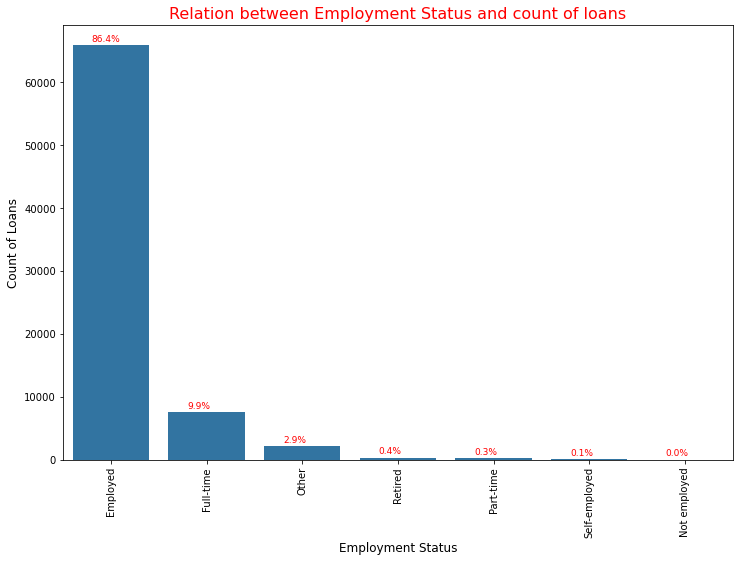

In [28]:
plt.figure(figsize=[12,8])
color=sb.color_palette()[0]
freq=df_sub['EmploymentStatus'].value_counts()
order=freq.index
n_freq=freq.sum()
sb.countplot(data=df_sub,x='EmploymentStatus',color=color,order=order);
for i in range (freq.shape[0]):
    count=freq[i]
    label='{:0.1f}%'.format(100*count/n_freq)
    plt.text(i-0.2,count+1000,label,va='center',fontsize=9,color='r')
plt.xlabel('Employment Status',fontsize=12);
plt.ylabel('Count of Loans',fontsize=12);
plt.title('Relation between Employment Status and count of loans',fontsize=16,color='red')
plt.xticks(rotation=90);

**INSIGHT**
- It seems that as much you are employed, you will get a loan as the bank wants to save his side that the **Borrowers** can       charge back the loans on time.

### <font color='blue'>4. Analyzing the relation between credite score range and count of loans:</font>

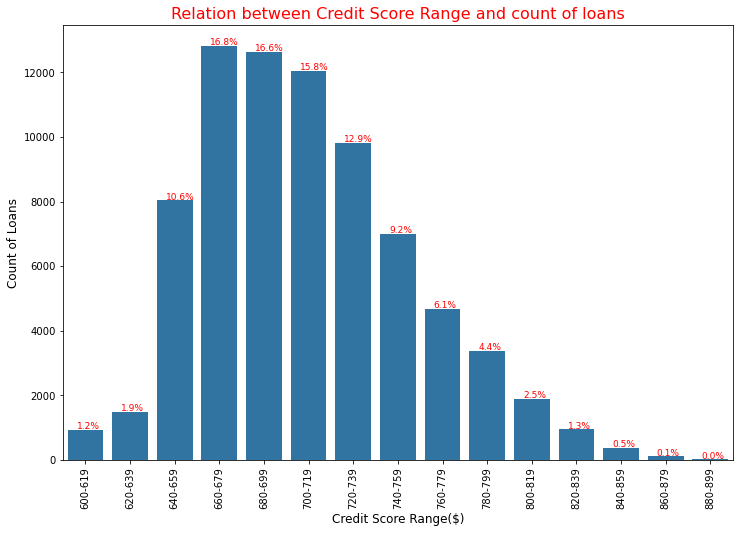

In [29]:
plt.figure(figsize=[12,8])
color=sb.color_palette()[0]
freq=df_sub['CreditScoreRange'].value_counts()
n_freq=freq.sum()
sb.countplot(data=df_sub,x='CreditScoreRange',color=color);
locs,labels=plt.xticks(rotation=90)
for loc,label in zip (locs,labels):
    count=freq[label.get_text()]
    label='{:0.1f}%'.format(100*count/n_freq)
    plt.text(loc-0.2,count+100,label,va='center',fontsize=9,color='r')
plt.xlabel('Credit Score Range($)',fontsize=12);
plt.ylabel('Count of Loans',fontsize=12);
plt.title('Relation between Credit Score Range and count of loans',fontsize=16,color='red')
plt.xticks(rotation=90);

**INSIGHT**
- It seems that **Borrowers** Having credit score in the range *640-759$* have the most count of loans but lower and higher         credit scores other than this range have lower count of loans.

### <font color='blue'>5. Analyzing the relation between ProsperRating_numeric and count of Borrowers:</font>

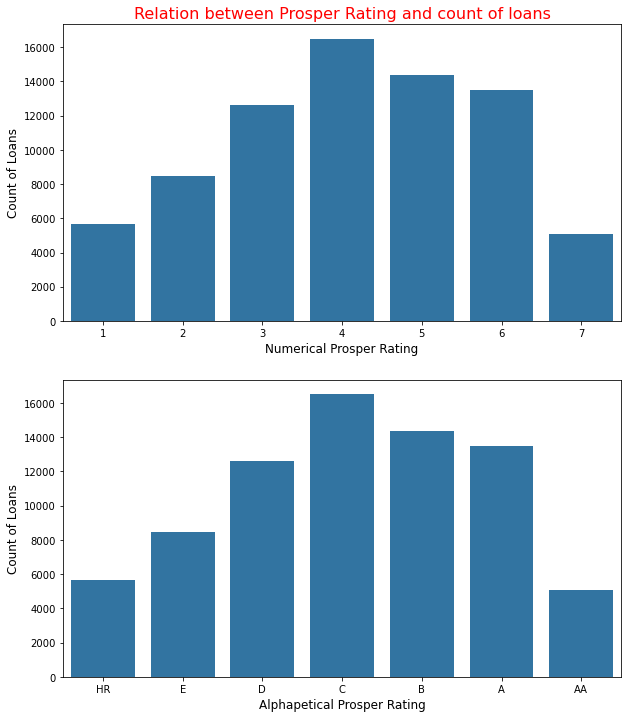

In [30]:
plt.figure(figsize=[10,12])
color=sb.color_palette()[0]
plt.subplot(2,1,1)
sb.countplot(data=df_sub,x='ProsperRating_numeric',color=color);
plt.xlabel('Numerical Prosper Rating',fontsize=12);
plt.ylabel('Count of Loans',fontsize=12);
plt.title('Relation between Prosper Rating and count of loans',fontsize=16,color='red')
plt.subplot(2,1,2)
freq=df_sub['ProsperRating_Alpha'].value_counts()
sb.countplot(data=df_sub,x='ProsperRating_Alpha',color=color);
plt.xlabel('Alphapetical Prosper Rating',fontsize=12);
plt.ylabel('Count of Loans',fontsize=12);

**INSIGHT**
- The numerical and alphapetical prosper score are quietly matching where **AA** represent the score with lowest risk like  **7** in numerical prosper score.

### <font color='blue'>6.Analyzing the relation between occupation and count of Borrowers:</font>

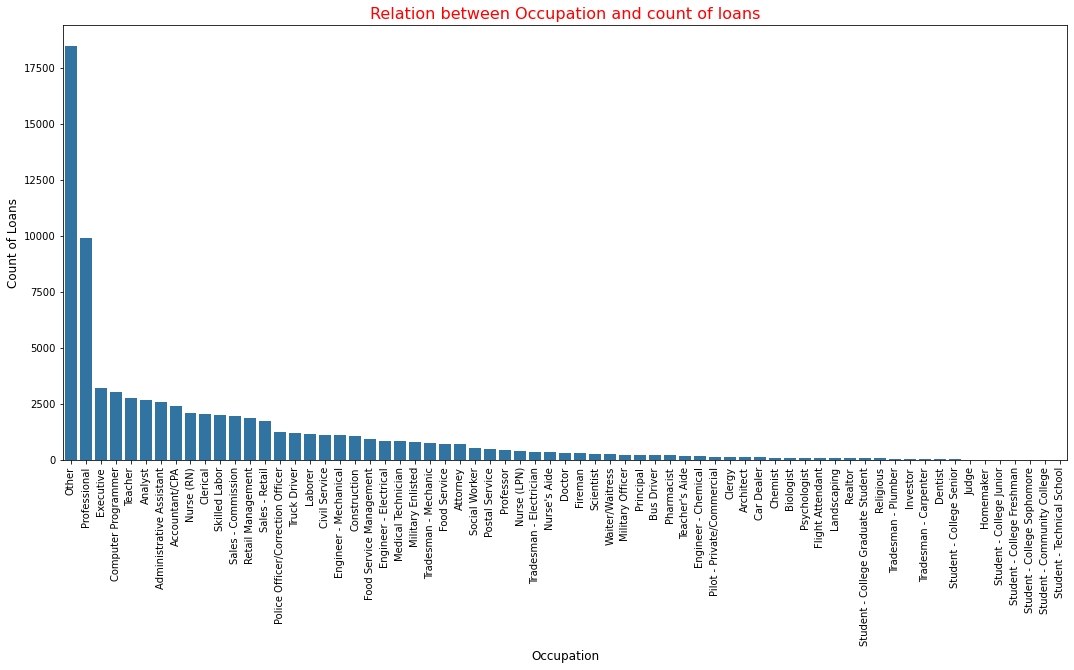

In [31]:
plt.figure(figsize=[18,8])
color=sb.color_palette()[0]
freq=df_sub['Occupation'].value_counts()
order=freq.index
sb.countplot(data=df_sub,x='Occupation',color=color,order=order);
plt.xlabel('Occupation',fontsize=12);
plt.ylabel('Count of Loans',fontsize=12);
plt.title('Relation between Occupation and count of loans',fontsize=16,color='red')
plt.xticks(rotation=90);

**INSIGHT**
- So, It seems that most of Borrowers from professionals,executive and computer programmers.

### <font color='blue'>7. Analyzing the relation between Debt To Income Ratio and number of Borrowers:</font>

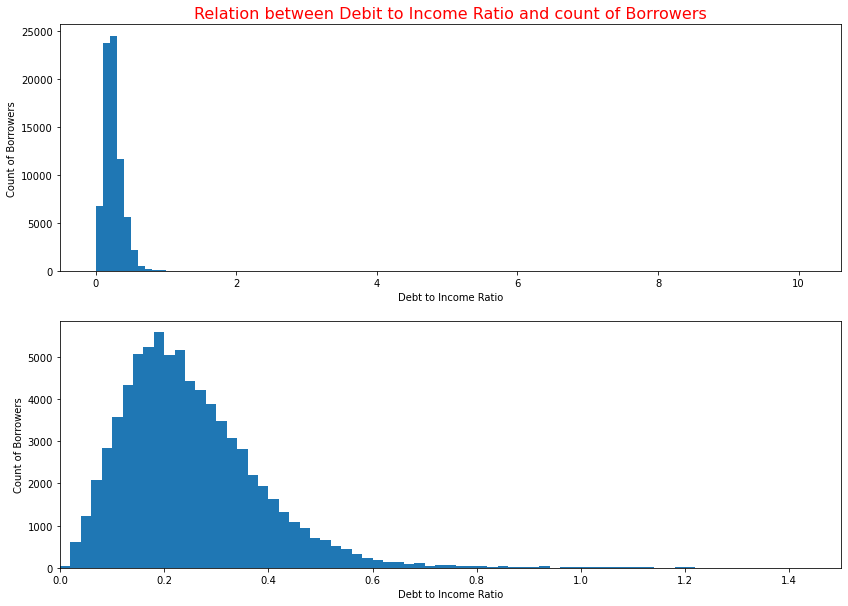

In [32]:
plt.figure(figsize=[14,10])
plt.subplot(2,1,1)
binsize = 0.1
bins = np.arange(0, df_sub['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df_sub, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Relation between Debit to Income Ratio and count of Borrowers',fontsize=16,color='r')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count of Borrowers');
plt.subplot(2,1,2)
binsize = 0.02
bins = np.arange(0, df_sub['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df_sub, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count of Borrowers');
plt.xlim(0,1.5);

**INSIGHT**
- It seems that most of borrowers have debot/income ratio mostly in the range **0-0.6** and high count of Borrowers have ratio of **0.2.**

### <font color='blue'>8.Analyzing the relation between Borrower APR and count of loans :</font>

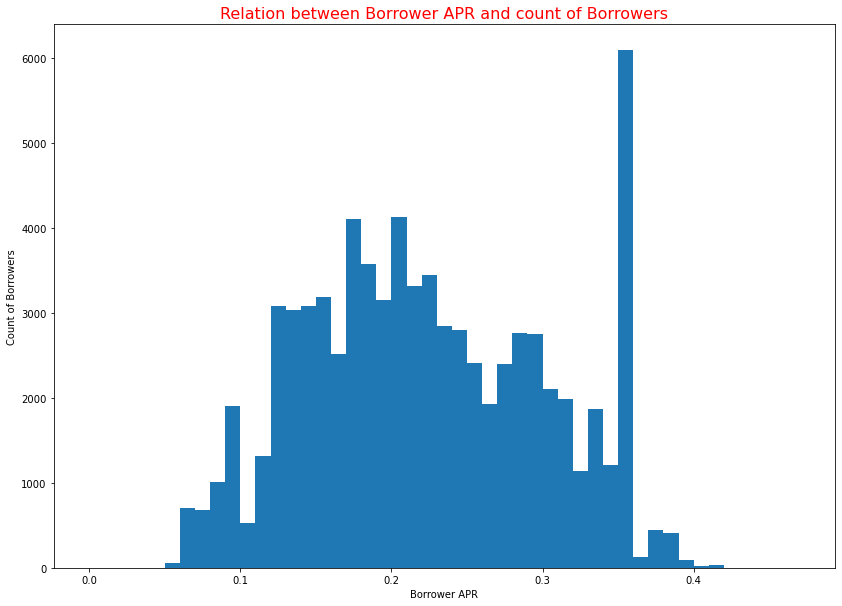

In [33]:
#defining bins and plotting using hist library:
bins = np.arange(0, df_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[14, 10])
plt.hist(data = df_sub, x = 'BorrowerAPR', bins = bins);
plt.title('Relation between Borrower APR and count of Borrowers',fontsize=16,color='red')
plt.xlabel('Borrower APR');
plt.ylabel('Count of Borrowers');

**INSIGHT**
- so it seems that the cost of loan differ from loan to other depending on other factors which we be detected later in this       analysis.

### <font color='blue'>9. Analyzing the relation between loan amount and no. of borrowers:</font>

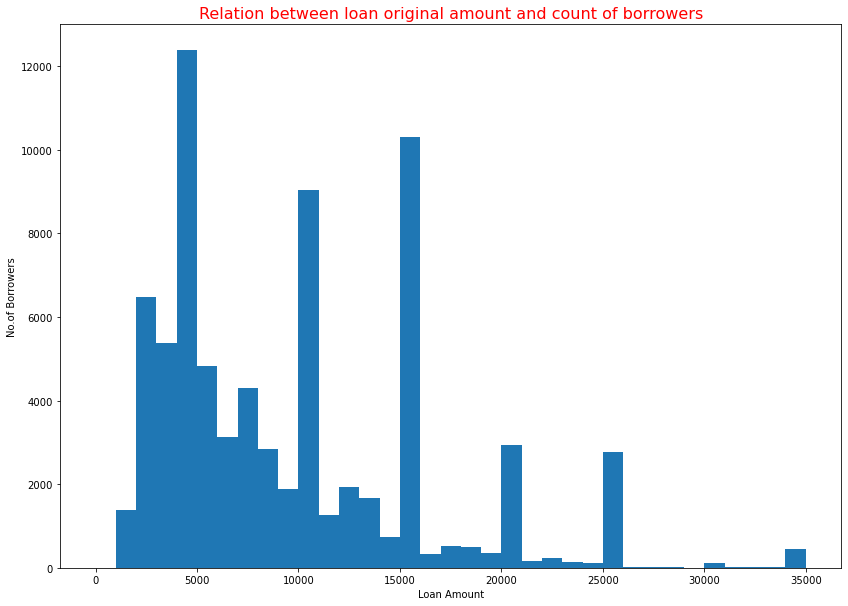

In [34]:
plt.figure(figsize=[14,10])
binsize = 1000
bins = np.arange(0,df_sub['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data = df_sub, x = 'LoanOriginalAmount', bins = bins)
plt.title('Relation between loan original amount and count of borrowers',fontsize=16,color='red')
plt.xlabel('Loan Amount');
plt.ylabel('No.of Borrowers');

**INSIGHT**
- So it seems that the loans in the range **2000** $ -10,000 $ represnt the majority of loans.  

### <font color='blue'>10.Analyzing the relation between count of Borrowers and stated monthly income:</font>

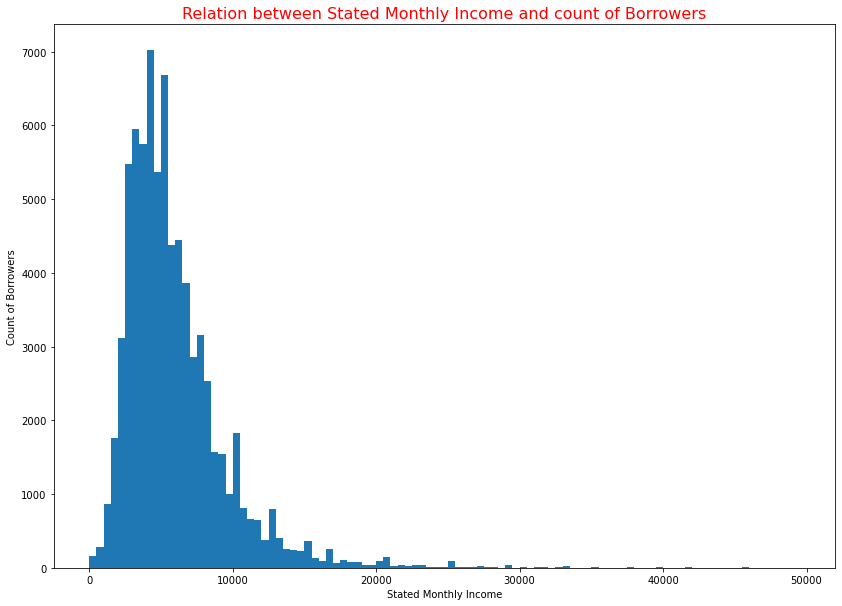

In [35]:
bins_smi = np.arange(0, 50000, 500)
plt.figure(figsize=[14,10])
plt.hist(data = df_sub, x = 'StatedMonthlyIncome', bins=bins_smi);
plt.title('Relation between Stated Monthly Income and count of Borrowers',fontsize=16,color='r');
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count of Borrowers');

**INSIGHT**
- So, it seems that most of Loan borrowers have monthly income in the range 0-10,000 $.

###### Summery of insights taken from **Univariate analysis**:
- Most of Borrower are from CA (12.6%),NY (6.8%),TX (6.7%),FL (6.2%) and IL (5.1%) and these states as known are                 characterized by high populations in United States.
- The number of current loans is very high relative to other loans status.
- It seems that as much you are employed, you will get a loan as the bank wants to save his side that the Borrowers can charge   back the loans on time.
- It seems that Borrowers Having credit score in the range 640-759 have the most count of loans but lower and higher credit       scores other than this range have lower count of loans.
- The numerical and alphapetical prosper score are quietly matching where most of Borrowers are concentrated in the middle       prosper score but there is an interesting point that there are many Borrowers with high risky score but they have loans.
- It seems that the most of Borrowers are from professionals,executive and computer programmers.
- It seems that most of borrowers have debot/income ratio mostly in the range 0-0.6 and high count of Borrowers have ratio of     0.2.
- It seems that the cost of loan differ from loan to other depending on other factors which we be detected later in this         analysis.
- So it seems that the loans in the range 2000  −10,000  represnt the majority of loans.
- most of Loan borrowers have monthly income in the range 0-10,000 $.

<a id='BI'></a>
# <font color='red'>- Bivariate Data Exploring, plot and analysis:</font> 

### <font color='blue'>1. plotting the heat map between the different variables:</font>

In [36]:
df_sub.columns

Index(['ListingKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_numeric', 'ProsperRating_Alpha', 'ProsperScore',
       'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'TotalInquiries',
       'DelinquenciesLast7Years', 'BankcardUtilization',
       'AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRange'],
      dtype='object')

In [37]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76216 entries, 0 to 76215
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ListingKey                76216 non-null  object  
 1   Term                      76216 non-null  category
 2   LoanStatus                76216 non-null  object  
 3   BorrowerAPR               76216 non-null  float64 
 4   BorrowerRate              76216 non-null  float64 
 5   ProsperRating_numeric     76216 non-null  category
 6   ProsperRating_Alpha       76216 non-null  category
 7   ProsperScore              76216 non-null  float64 
 8   ListingCategory           76216 non-null  category
 9   BorrowerState             76216 non-null  object  
 10  Occupation                76216 non-null  object  
 11  EmploymentStatus          76216 non-null  object  
 12  EmploymentStatusDuration  76216 non-null  int32   
 13  IsBorrowerHomeowner       76216 non-null  bool

In [38]:
# Numberical vs Categorical features
vars_numerical = ['Term','ProsperScore', 'EmploymentStatusDuration', 'BankcardUtilization', 'BorrowerAPR','BorrowerRate',
               'DebtToIncomeRatio', 'LoanOriginalAmount','AvailableBankcardCredit','MonthlyLoanPayment']
vars_categorical = ['LoanStatus', 'ListingCategory','EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRange','CreditScoreRange']

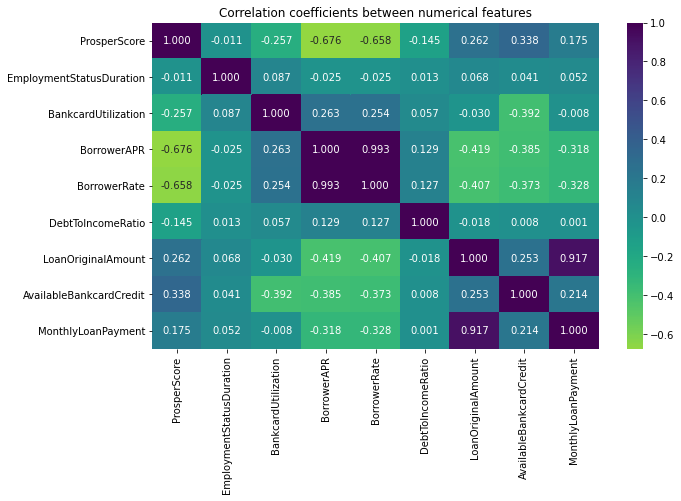

In [39]:
# Correlation plot between numerical features:
plt.figure(figsize = [10, 6])
sb.heatmap(df_sub[vars_numerical].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Correlation coefficients between numerical features')
plt.show()

**INSIGHT**
- The following insights are observed:

1- Strong negative relationships between **ProsperScore** & **BorrowerAPR and BorrowerRate**.

2- Strong positive relation between **BorrowerAPR and BorrowerRate** and this is normal and also between **MonthlyLoanPayment**      and **LoanOriginalAmount**.

3- Medium negative relationships between **LoanOriginalAmount** and **AvailableBankcardCredit** & **BorrowerAPR and                  BorrowerRate** and also between **BankCardUtilization** and **ProsperScore** and also between **. 

4- Medium positive relationships between **LoanOriginalAmount** and **AvailableBankcardCredit** & **ProsperScore** and also          between **BankCardUtilization** and  **BorrowerAPR and BorrowerRate**.

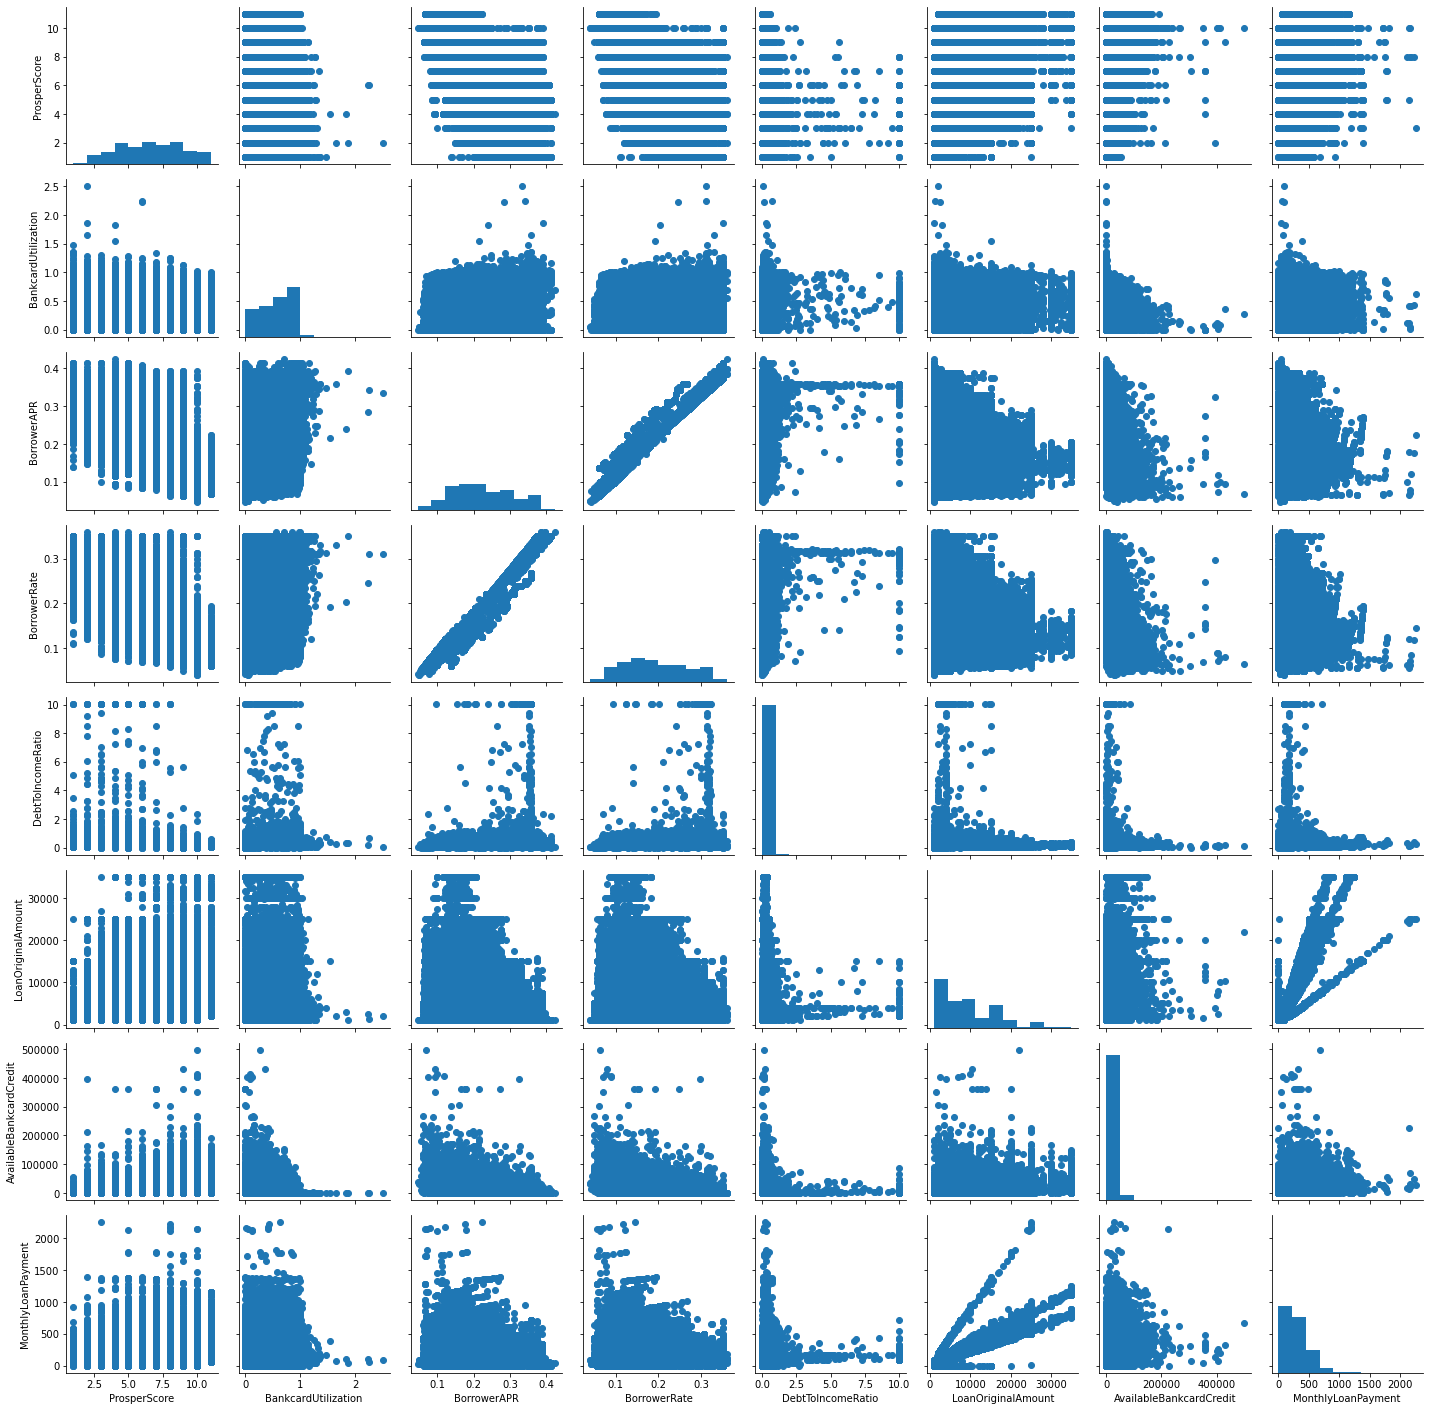

In [40]:
#selecting the columns of concern as mentioned before:
vars_numerical = ['ProsperScore', 'BankcardUtilization', 'BorrowerAPR','BorrowerRate',
               'DebtToIncomeRatio', 'LoanOriginalAmount','AvailableBankcardCredit','MonthlyLoanPayment']
g = sb.PairGrid(data = df_sub, vars = vars_numerical)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

<Figure size 1440x1080 with 0 Axes>

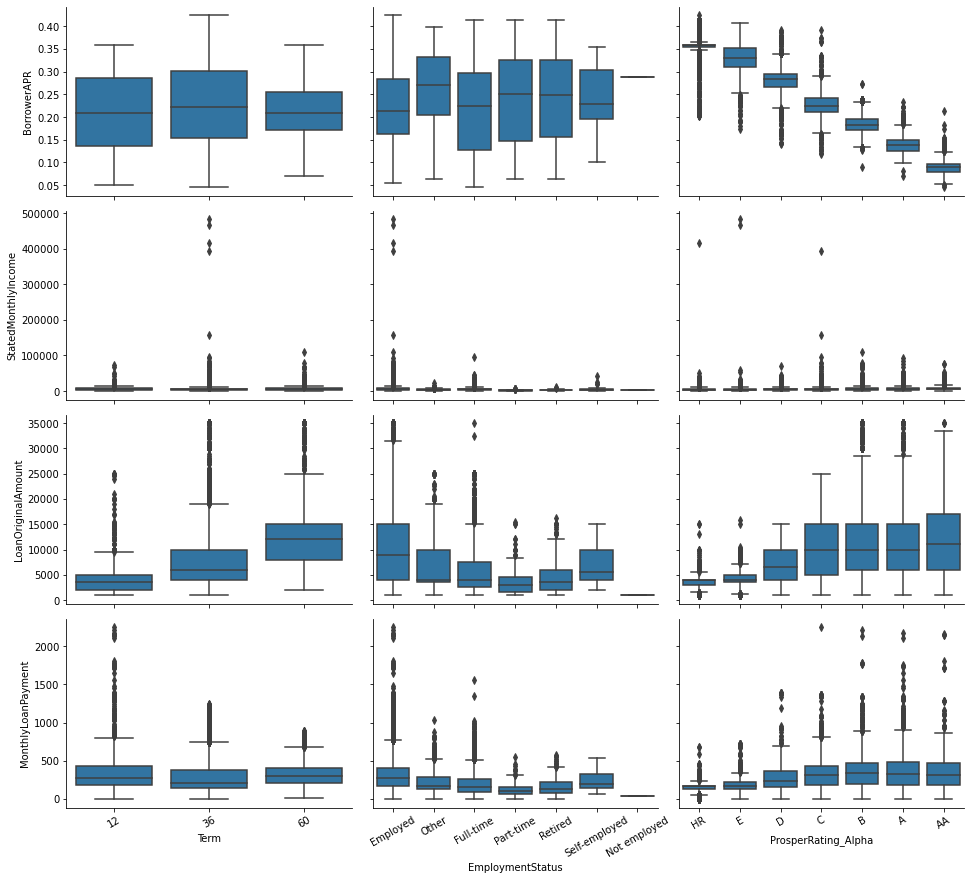

In [41]:
# plotting matrix of numerical features against categorical features.
# selecting the categorecal columns of concern to check the relationships between cost of Loan represented by 'BorrowerAPR' and
# and other features like 'Prosper rating','terms'.. as shown: 
vars_categorical=['Term','EmploymentStatus', 'ProsperRating_Alpha']
def boxgrid(x, y, **kwargs):
    color = sb.color_palette()[0]
    sb.boxplot(x, y, color = color)
    plt.xticks(rotation=30);
plt.figure(figsize = [20, 15])
g = sb.PairGrid(data = df_sub, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','MonthlyLoanPayment'], 
                x_vars = vars_categorical , size = 3, aspect = 1.5)
g.map(boxgrid);

**INSIGHT** 
- SO, Again as much the rating become near to **AA** the Loan original amount increase and cost of loan decrease as represented   by BorrowerAPR.
- As much you become employed, the amount of original loan increases and consequently the monthly loan payment                   increases.
- As much the loan terms increases, the loan original amount also increases in a positive relationship but the interesting       point in the Term variable is that the cost of loan 'BorrowerAPR' is the higher in case of 36 term followed by 12 and then     60.

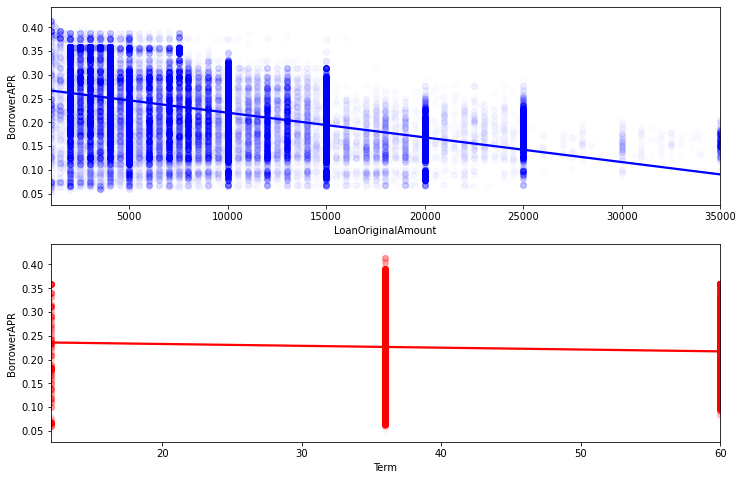

In [42]:
# so let us check the relationship between loan original amount which is directly proportional to no. of loan terms against loan cost:
plt.figure(figsize = [12, 8])
plt.subplot(2,1,1)
sb.regplot(data = df_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01},color='blue');
plt.subplot(2,1,2)
sb.regplot(data = df_sub, x = 'Term', y = 'BorrowerAPR', scatter_kws={'alpha':0.01},color='red');

**INSIGHT**
- so as shown, as the amount of loan increases, the cost of loan relatively decrease and i think this issue is a commercial       issue to encourage people to have loans.

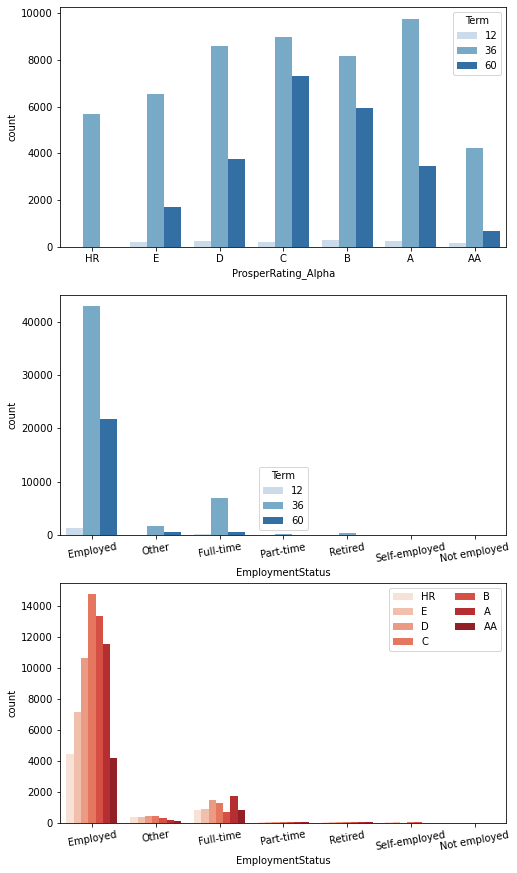

In [43]:
plt.figure(figsize = [8, 15])

# subplot 1: Prosper rating Against Term
plt.subplot(3, 1, 1)
sb.countplot(data = df_sub, x = 'ProsperRating_Alpha', hue = 'Term', palette = 'Blues')
# subplot 2: employment status against Term of loan.
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: prosper rating against employment status using different colors by pallete:
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'ProsperRating_Alpha', palette = 'Reds')
# re-arranging legend to remove overlapping
ax.legend(loc = 1, ncol = 2); 
plt.xticks(rotation=10);

- we can see that there is a strong interaction between **'Term'** and **'ProsperRating_Alpha'** and Proportionally, there are   more 60 month loans Term on B   and C ratings and There is only 36 month loans Term for HR rating borrowers.

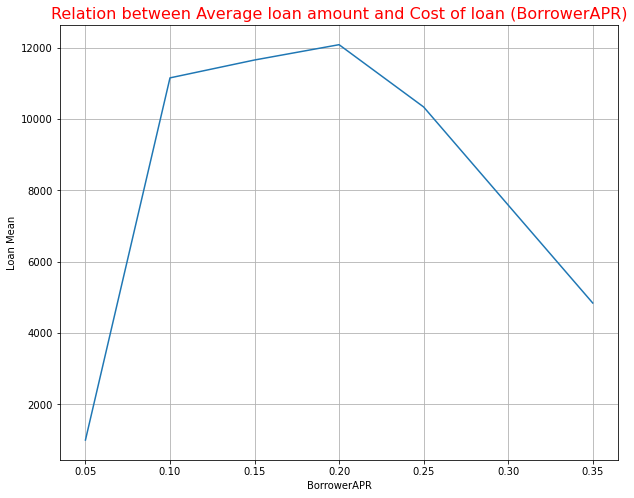

In [44]:
plt.figure(figsize=[10,8])
bins_e=np.arange(0,0.4,0.05)
bins_c=bins_e[:-1]+0.05
APR_binned=pd.cut(df_sub['BorrowerAPR'],bins_e,include_lowest=True)
Loan_mean=df_sub['LoanOriginalAmount'].groupby(APR_binned).mean()
plt.errorbar(x=bins_c,y=Loan_mean);
plt.title('Relation between Average loan amount and Cost of loan (BorrowerAPR)',fontsize=16,color='red');
plt.xlabel('BorrowerAPR');
plt.grid()
plt.ylabel('Loan Mean');

- So this proves that the cost of loan depend on other factors like the score rate , available credit and employment status as   mentioned before as the all range is not directly proportional with BorrowerAPR.

<a id='MLTY'></a>
# <font color='red'>Multivariate Data Exploring, plot and analysis: </font>


### <font color='blue'>1. Analyzing the relation between Prosper rate ,original loan amount and if the Borrower have home or not: </font>

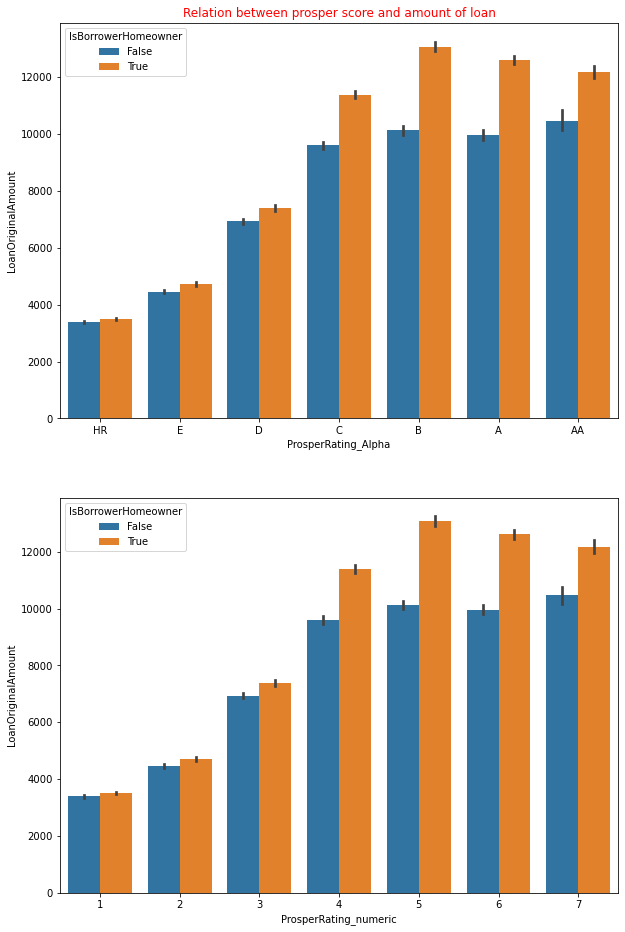

In [45]:
plt.figure(figsize=[10,16])
plt.subplot(2,1,1)
sb.barplot(data=df_sub,x='ProsperRating_Alpha',y='LoanOriginalAmount',hue='IsBorrowerHomeowner');
plt.title('Relation between prosper score and amount of loan',fontsize=12,color='r');
plt.subplot(2,1,2)
sb.barplot(data=df_sub,x='ProsperRating_numeric',y='LoanOriginalAmount',hue='IsBorrowerHomeowner');

**INSIGHT**
- It seems that with having higher prosper rating , the amount of lended loan increase in addition to if you have home , the       amount of lended loan increase in the same prosper score and this is logic as the bank always needs to preserve his money to   gurantee that the Borrower will return back.

 
### <font color='blue'>2. Analyzing therelation between Prosper rate ,original loan amount and if the Borrower have home or not:</font>


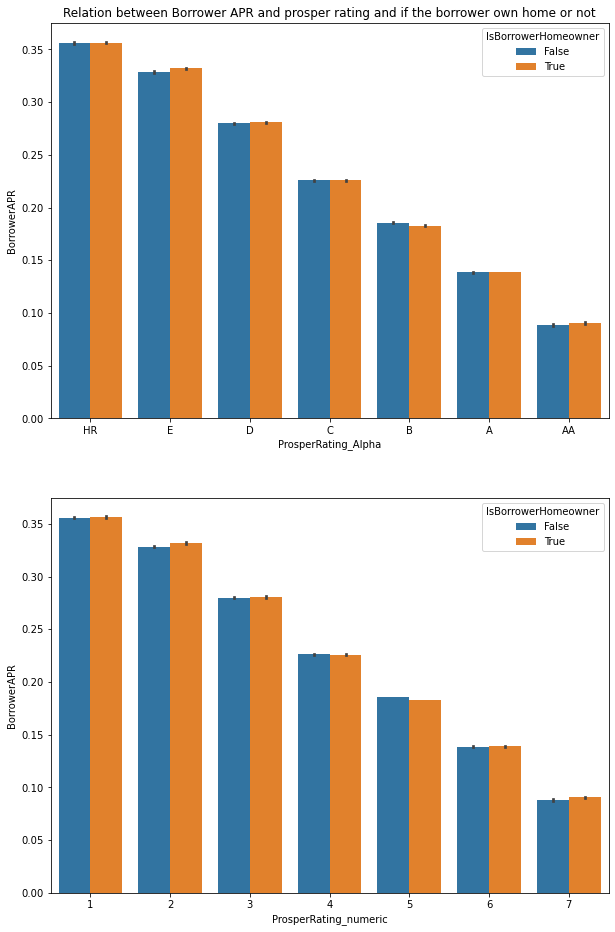

In [46]:
plt.figure(figsize=[10,16])
plt.subplot(2,1,1)
sb.barplot(data=df_sub,x='ProsperRating_Alpha',y='BorrowerAPR',hue='IsBorrowerHomeowner');
plt.title('Relation between Borrower APR and prosper rating and if the borrower own home or not');
plt.subplot(2,1,2)
sb.barplot(data=df_sub,x='ProsperRating_numeric',y='BorrowerAPR',hue='IsBorrowerHomeowner');

**INSIGHT**
- so as mentioned before in Bivariate analysis that the cost of loan depend on many factors and one of these factors is the       prosper rating where with having excellent prosper rating **AA** the cost of loan becomes lower.


### <font color='blue'> 3. Analyzing the Relation between Prosper Score ,BorrowerAPR and if the Borrower have home or not:</font>

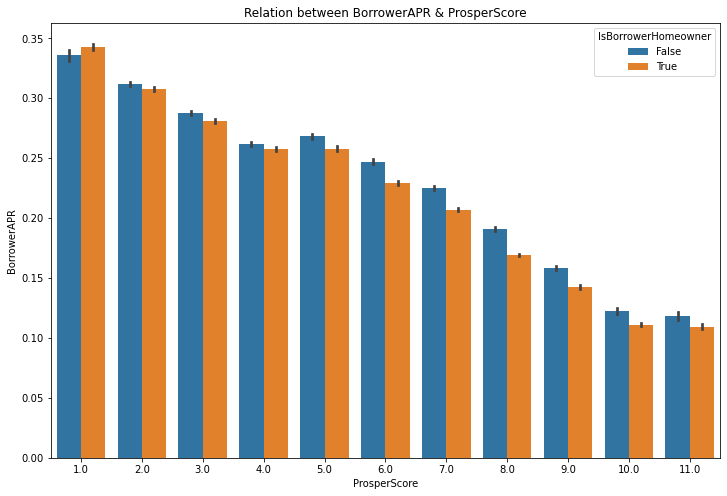

In [47]:
plt.figure(figsize=[12,8])
sb.barplot(data=df_sub,x='ProsperScore',y='BorrowerAPR',hue='IsBorrowerHomeowner');
plt.title('Relation between BorrowerAPR & ProsperScore');

**INSIGHT**
- As mentioned before the BorrowerAPR depends also on the prosper score where as the prosper score increase , the risk of         lending a borrower decreases and consequently the cost of loan decrease and also it become slightly lower for Borrower having   homes.


### <font color='blue'> 4. Analyzing the Relation between Prosper Score ,BorrowerAPR and Prosper rating:</font>

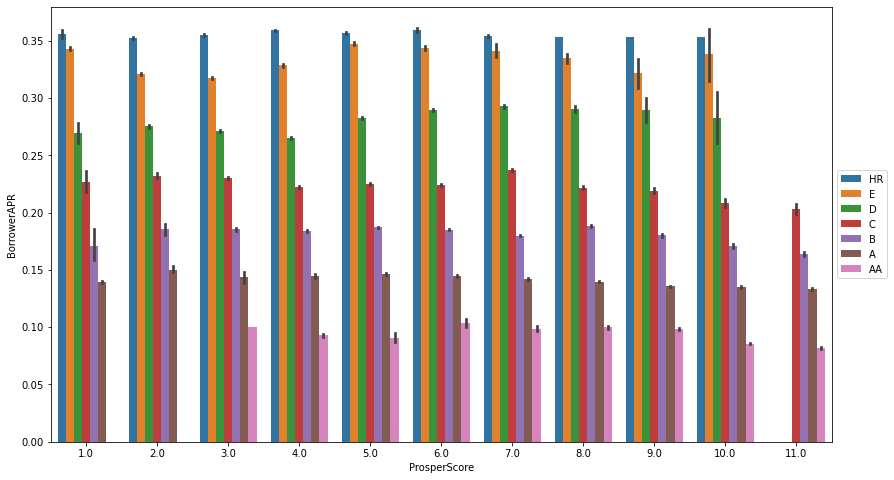

In [48]:
plt.figure(figsize=[14,8])
sb.barplot(data=df_sub,x='ProsperScore',y='BorrowerAPR',hue='ProsperRating_Alpha');
plt.legend(loc = 6, bbox_to_anchor = (1.0,0.5)); # legend to right of figure

**INSIGHT**
- Also as clearly shown, the cost of loan depend on prosper rating with prosper score where as much the rating is excellent,     the cost of loan decreases. 


### <font color='blue'> 5. Analyzing the Relation between Credit Score Range ,BorrowerAPR and if the borrower have home or not:</font>


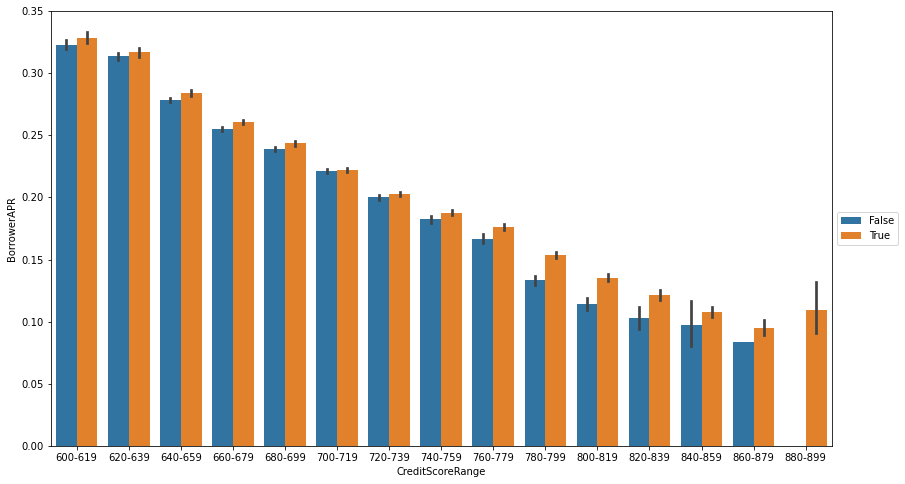

In [49]:
plt.figure(figsize=[14,8])
sb.barplot(data=df_sub,x='CreditScoreRange',y='BorrowerAPR',hue='IsBorrowerHomeowner');
plt.legend(loc = 6, bbox_to_anchor = (1.0,0.5)); # legend to right of figure

**INSIGHT**
- Also as clearly shown, the cost of loan depend on **credit score range** where as much the range increases,the cost of loan         decreases. 

<a id='CONCL'></a>

# <font color='red'> Final insights , plots and inclusion:</font>

#### From the previous analysises, it is clear that Cost of loan 'BorrowerAPR' is variable with loan amount and not fixed  as       there            are other factors to be taken in to consideraion before lending the loan.

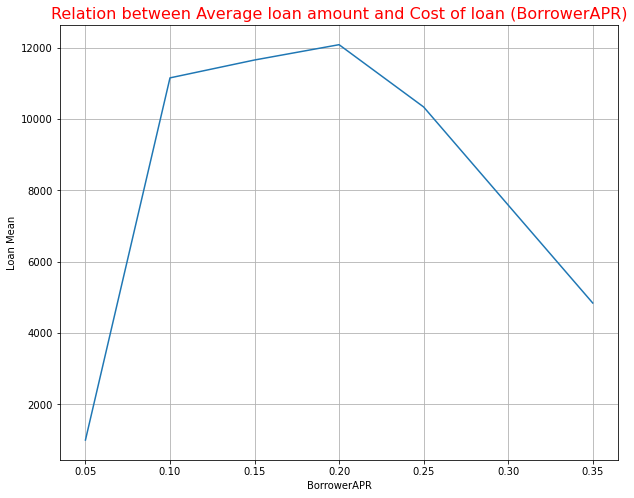

In [50]:
plt.figure(figsize=[10,8])
bins_e=np.arange(0,0.4,0.05)
bins_c=bins_e[:-1]+0.05
APR_binned=pd.cut(df_sub['BorrowerAPR'],bins_e,include_lowest=True)
Loan_mean=df_sub['LoanOriginalAmount'].groupby(APR_binned).mean()
plt.errorbar(x=bins_c,y=Loan_mean);
plt.title('Relation between Average loan amount and Cost of loan (BorrowerAPR)',fontsize=16,color='red');
plt.xlabel('BorrowerAPR');
plt.grid()
plt.ylabel('Loan Mean');

#### The cost of loan depend on many factors as follow:

  1- **Prosper rating** in addition to if the borrower have home or not where with having better rating like **AA**, the loan        of cost becomes lower and also the permitted loan amount becomes more.

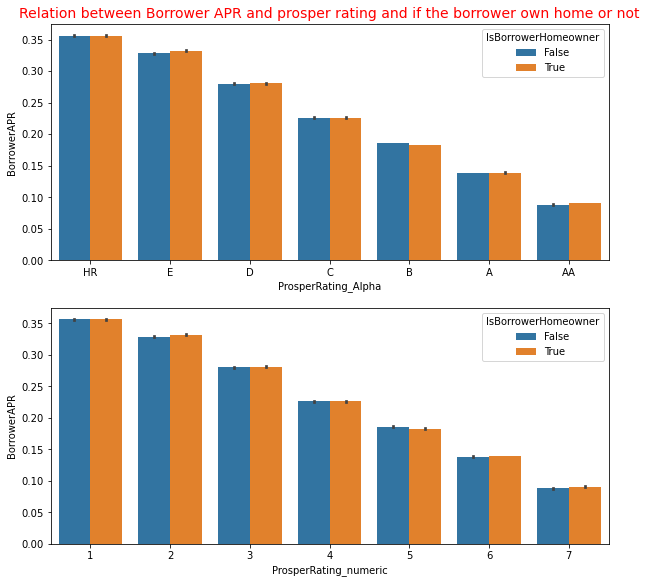

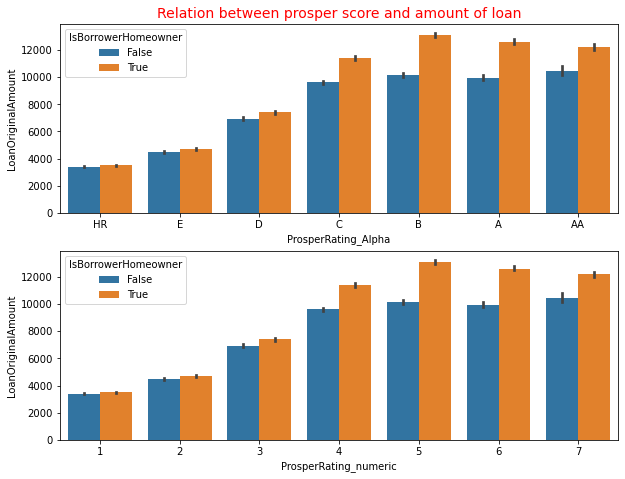

In [51]:
plt.figure(figsize=[10,20])
plt.subplot(4,1,1)
sb.barplot(data=df_sub,x='ProsperRating_Alpha',y='BorrowerAPR',hue='IsBorrowerHomeowner');
plt.title('Relation between Borrower APR and prosper rating and if the borrower own home or not',fontsize=14,color='r');
plt.subplot(4,1,2)
sb.barplot(data=df_sub,x='ProsperRating_numeric',y='BorrowerAPR',hue='IsBorrowerHomeowner');
plt.figure(figsize=[10,16])
plt.subplot(4,1,3)
sb.barplot(data=df_sub,x='ProsperRating_Alpha',y='LoanOriginalAmount',hue='IsBorrowerHomeowner');
plt.title('Relation between prosper score and amount of loan',fontsize=14,color='r');
plt.subplot(4,1,4)
sb.barplot(data=df_sub,x='ProsperRating_numeric',y='LoanOriginalAmount',hue='IsBorrowerHomeowner');

2- **Prosper Score** where as much the prosper score becomes high,the risk of lending the borrower becomes lower and loan cost    becomes low.

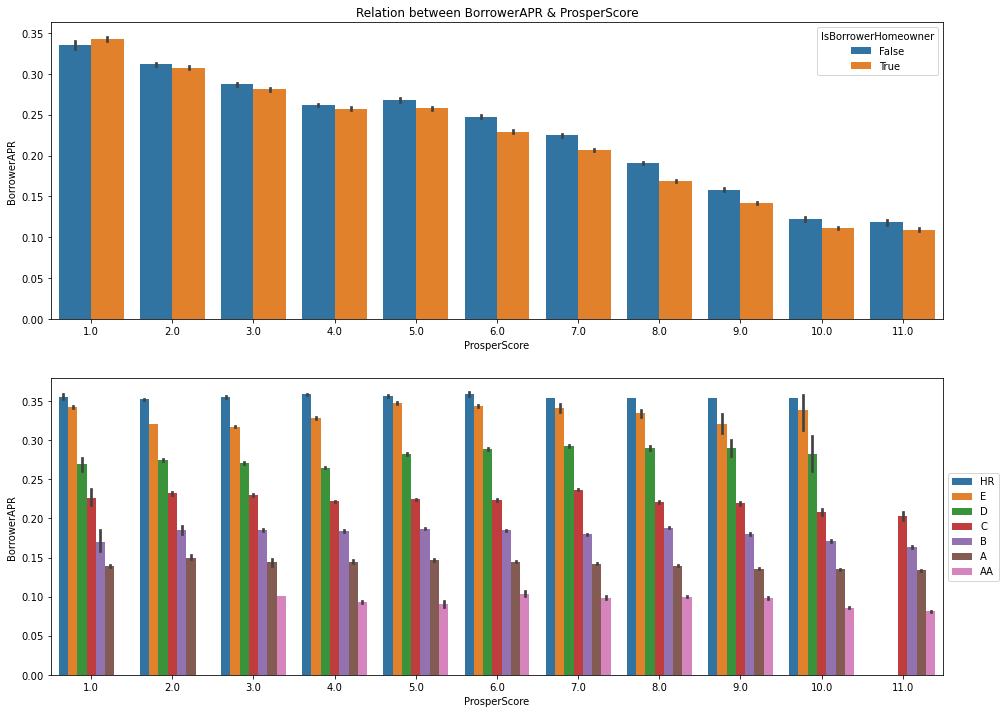

In [52]:
plt.figure(figsize=[16,12])
plt.subplot(2,1,1)
sb.barplot(data=df_sub,x='ProsperScore',y='BorrowerAPR',hue='IsBorrowerHomeowner');
plt.title('Relation between BorrowerAPR & ProsperScore');
plt.subplot(2,1,2)
sb.barplot(data=df_sub,x='ProsperScore',y='BorrowerAPR',hue='ProsperRating_Alpha');
plt.legend(loc = 6, bbox_to_anchor = (1.0,0.5)); # legend to right of figure

3- **CreditScoreRange** where the cost of loan decreases with increasing the credit score range.

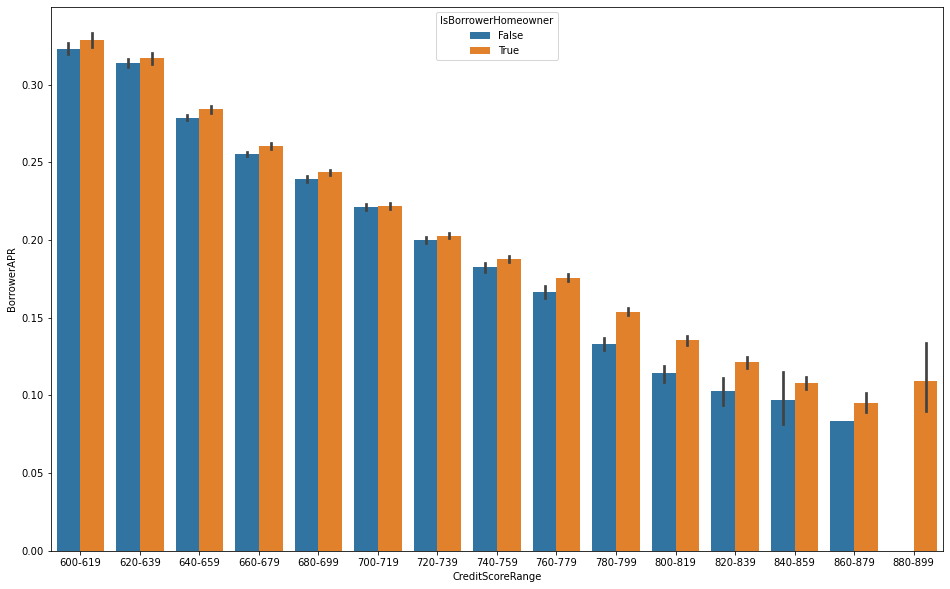

In [53]:
plt.figure(figsize=[16,10])
sb.barplot(data=df_sub,x='CreditScoreRange',y='BorrowerAPR',hue='IsBorrowerHomeowner');